Tweets: original text of the tweet.
Retweets: number of retweets of the current tweet.
Likes: number of likes of the current tweet.
Date: date of creation of the tweet.
Cleaned_tweets: text of the tweet after removing 'RT', hashtags, hyperlinks, mentions, emojis, leading and trailing whitespaces.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

%matplotlib inline

In [2]:
df = pd.read_csv("rawdata.csv")

In [3]:
df

,Tweets,Retweets,Likes,Date
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32
...,...,...,...,...
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweets    3060 non-null   object
 1   Retweets  3060 non-null   int64 
 2   Likes     3060 non-null   int64 
 3   Date      3060 non-null   object
dtypes: int64(2), object(2)
memory usage: 95.8+ KB


### DATA CLEANING

In [5]:
#creating function to cleaning the tweets
def cleantwt (twt):
  emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

  twt = re.sub('RT', '', twt) # remove 'RT' from tweets
  twt = re.sub('#[A-Za-z0-9]+', '', twt) # remove the '#' from the tweets
  twt = re.sub('\\n', '', twt) # remove the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt) # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt) # remove @mentions
  twt = re.sub('^[\s]+|[\s]+$', '', twt) # remove leading and trailing whitespaces
  twt = re.sub(emoj, '', twt) # remove emojis
  return twt

In [6]:
df["cleaned_tweets"] = df["Tweets"].apply(cleantwt)

In [7]:
df

,Tweets,Retweets,Likes,Date,cleaned_tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!
...,...,...,...,...,...
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06,Just that manganese is an alternative to iron ...
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20,Exactly
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57,Your policies are directly responsible for the...
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27,You should be voted out of office


In [8]:
df.head()

,Tweets,Retweets,Likes,Date,cleaned_tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!


In [9]:
df.drop(df[df["cleaned_tweets"] == ''].index, inplace = True)

In [10]:
df.head()

,Tweets,Retweets,Likes,Date,cleaned_tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Tweets            0
Retweets          0
Likes             0
Date              0
cleaned_tweets    0
dtype: int64

### SENTIMENT ANALYSIS



 Here we are going to check the POLARITY and SUBJECTIVITY of the cleaned_tweets. 

In [13]:
#creating funct. for subjectivity
def getsubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity
#creating funct. for polarity
def getpolarity(twt):
    return TextBlob(twt).sentiment.polarity

In [14]:
df["Subjectivity"] = df["cleaned_tweets"].apply(getsubjectivity)
df["Polarity"] = df["cleaned_tweets"].apply(getpolarity)

In [15]:
#creating the funct. to label and classify the neg.,pos. and neutral sentiments
def getsentiments(value):
    if value < 0:
        return 'negative'
    elif value > 0:
        return 'positive'
    else:
        return 'neutral'

df["sentiment"] = df["Polarity"].apply(getsentiments)

In [16]:
df.head()

,Tweets,Retweets,Likes,Date,cleaned_tweets,Subjectivity,Polarity,sentiment
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.20,0.2000,positive
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,0.90,0.2000,positive
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,0.00,0.0000,neutral
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!,0.65,0.4375,positive
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!,0.00,0.0000,neutral


# DATA VISUALIZATION

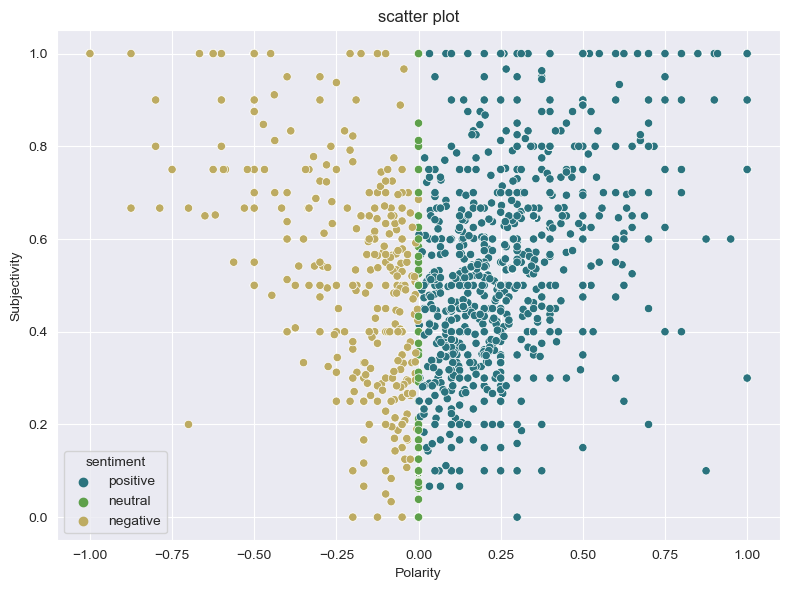

In [39]:
sns.set_style('darkgrid')
plt.figure(figsize = (8,6))


m = {'positive':'o','neutral':'s','negative':'x'}
sns.scatterplot(data = df, x = 'Polarity',y = 'Subjectivity', hue = 'sentiment',
                markers = m, palette = 'gist_earth')
plt.title('scatter plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

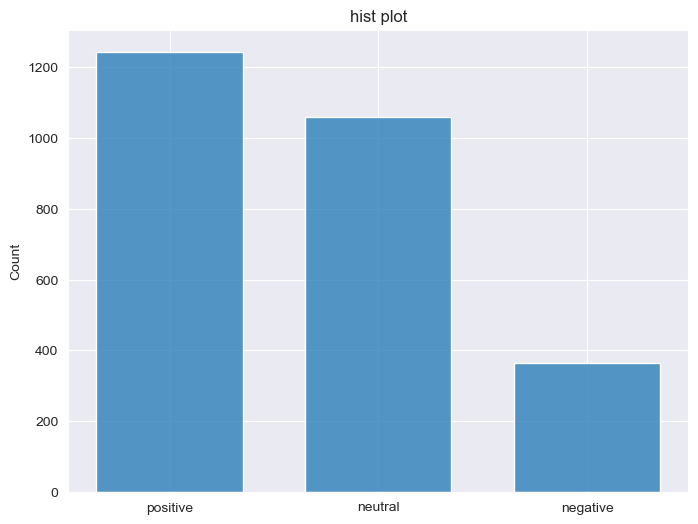

In [59]:
plt.figure(figsize = (8,6))

sns.histplot(df,x = 'sentiment',shrink = 0.7).set(xlabel=None)
plt.title('hist plot')
plt.show()

This plot show that there is highly subjective in elon musk's tweet.